In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("C:/Users/rajkh/Desktop/project")
training_data = pd.read_csv('House_Train.csv')
test_data = pd.read_csv('House_Test.csv')

In [4]:
pd.pandas.set_option('display.max_columns',None)
training_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
#Let's check missing values.
feature_na = [feature for feature in training_data.columns if training_data[feature].isnull().sum() > 1]

# Let's print features with missing values along with it's data-type.
for features in feature_na:
    print(features, np.round(training_data[features].isnull().mean() ,4), '% missing values data type: ', training_data[features].dtype)

LotFrontage 0.1774 % missing values data type:  float64
Alley 0.9377 % missing values data type:  object
MasVnrType 0.0055 % missing values data type:  object
MasVnrArea 0.0055 % missing values data type:  float64
BsmtQual 0.0253 % missing values data type:  object
BsmtCond 0.0253 % missing values data type:  object
BsmtExposure 0.026 % missing values data type:  object
BsmtFinType1 0.0253 % missing values data type:  object
BsmtFinType2 0.026 % missing values data type:  object
FireplaceQu 0.4726 % missing values data type:  object
GarageType 0.0555 % missing values data type:  object
GarageYrBlt 0.0555 % missing values data type:  float64
GarageFinish 0.0555 % missing values data type:  object
GarageQual 0.0555 % missing values data type:  object
GarageCond 0.0555 % missing values data type:  object
PoolQC 0.9952 % missing values data type:  object
Fence 0.8075 % missing values data type:  object
MiscFeature 0.963 % missing values data type:  object


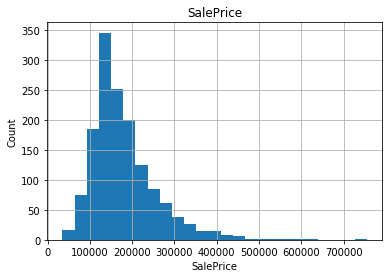

In [26]:
# Let's have a look at our target variable.
training_data['SalePrice'].hist(bins=25)
plt.xlabel('SalePrice')
plt.ylabel("Count")
plt.title('SalePrice')
plt.show()

# Clearly visible that the target variable is not normally distributed, we'll need to perform some transformation.

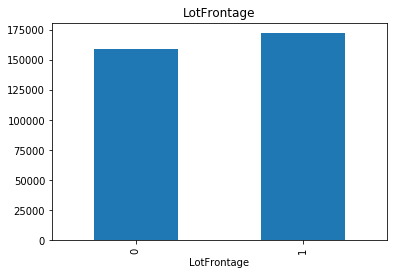

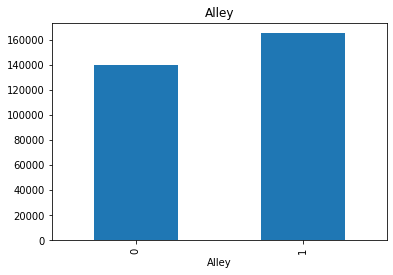

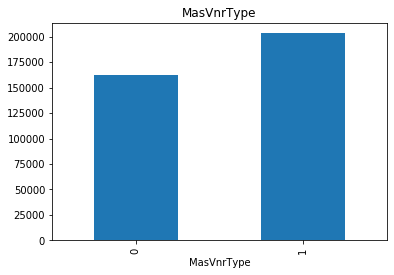

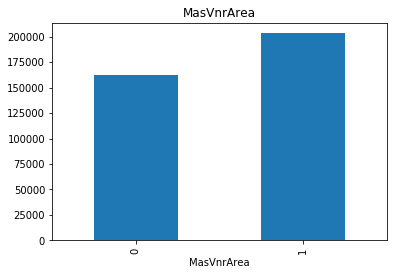

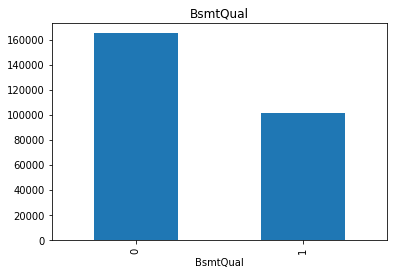

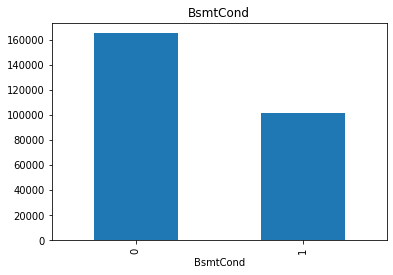

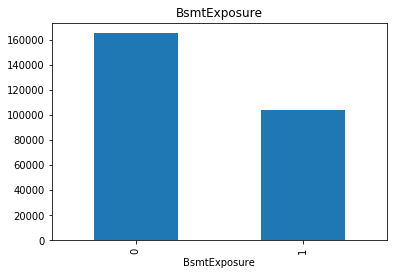

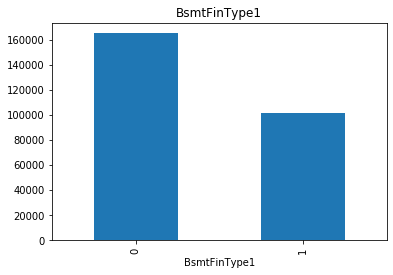

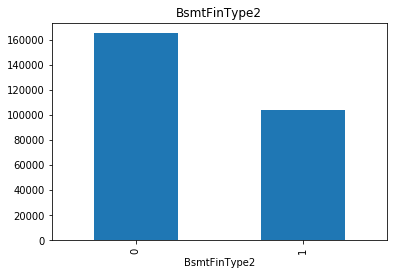

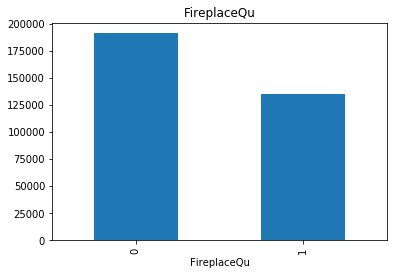

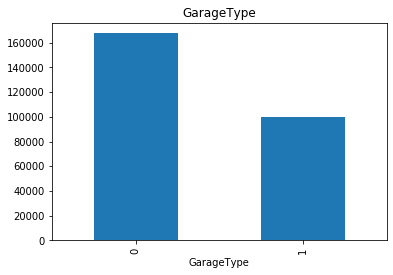

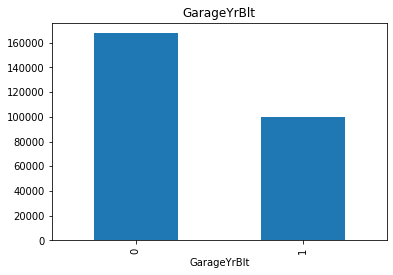

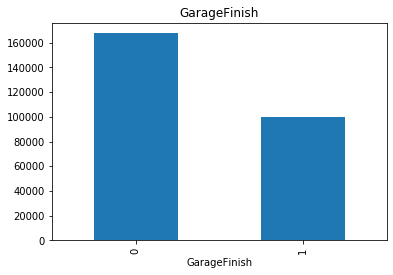

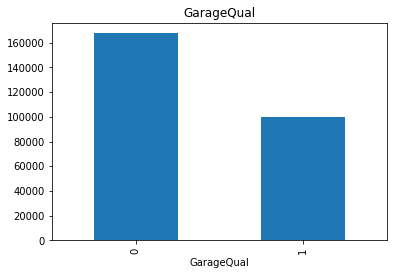

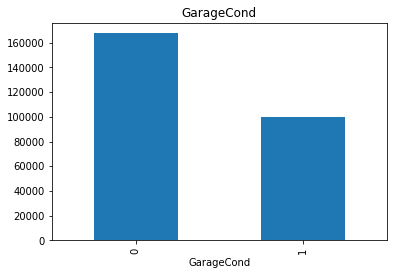

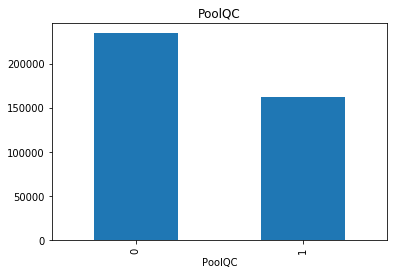

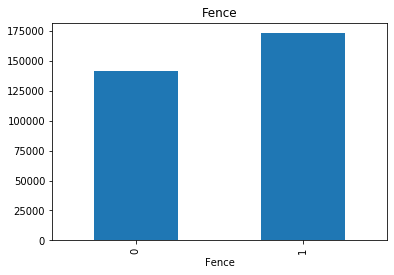

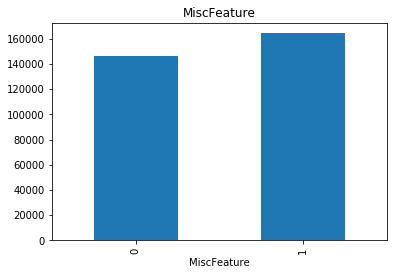

In [35]:
# we need to analyze missing values with respect to target variable to check any relationship exists.
data = training_data.copy()
for feature in feature_na:    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    
# We took Median, because we saw earlier that salesprice is skewed. Features with missing values generally have high SalePrice median.
# Before imputing missign values we'll check distribution of all variables.

In [24]:
#Let's check how many numerical features do we have.
numerical_features = [features for features in training_data.columns if training_data[features].dtype !='O']
print(numerical_features)


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [37]:
# Let's check how many Temporal(Date-Time) features do we have.
temporal_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
temporal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [47]:
# let's check how many unique values do each feature has.

for feature in temporal_feature:
    print(feature, " has ", len(training_data[feature].unique()), " unique values")

YearBuilt  has  112  unique values
YearRemodAdd  has  61  unique values
GarageYrBlt  has  98  unique values
YrSold  has  5  unique values


Text(0.5, 1.0, 'House Price V.S Year Sold')

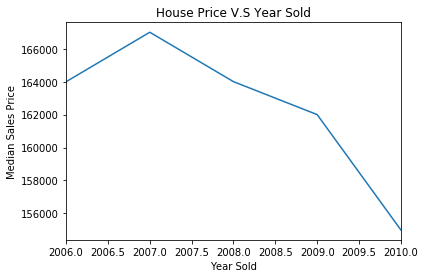

In [49]:
# let's check if yearsold has any relationship with SalePrice

training_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sales Price')
plt.title('House Price V.S Year Sold')

# This does not seems to be logigal, we'll need to find difference between Year-Sold and Year-built only then we can say something
# For Ex. Price declines if house is too old.

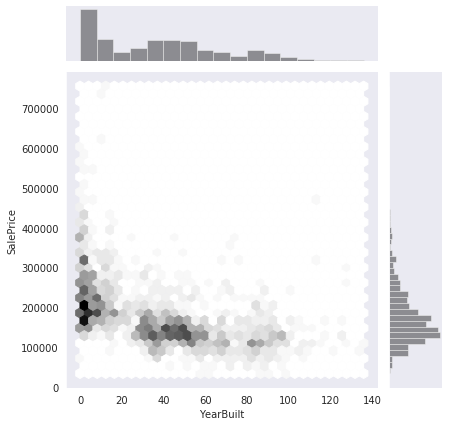

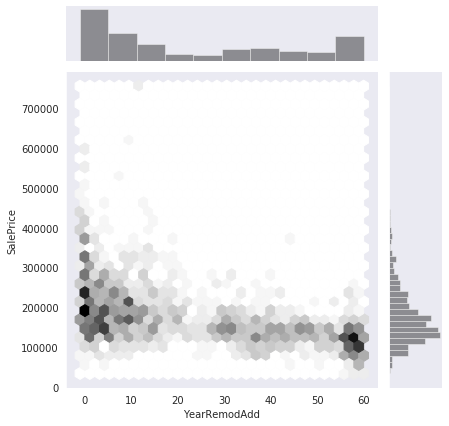

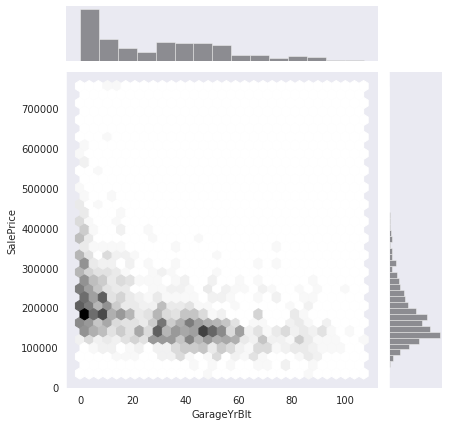

In [63]:
data = training_data.copy()
for feature in temporal_feature:
    if feature != 'YrSold':
        data[feature] = data['YrSold'] - data[feature]
        #plt.scatter(data[feature], data['SalePrice'])
        #plt.xlabel(feature)
        #plt.ylabel('SalePrice')
        #plt.show()
        with sns.axes_style("dark"):
            sns.jointplot(x=data[feature], y=data['SalePrice'], kind="hex", color="k");

#For Ex. We can clearly see that Sales Price is high when difference between Year_Built and Year_Sold was low